In [1]:
import os 
#!pip3 install plotnine
!pip3 uninstall --yes patchworklib
os.chdir("/Users/hideto/dropbox/HIDETO_MORI.LAB/Experiments/Project/Patchplot/patchworklib")
!python3 setup.py install

Found existing installation: patchworklib 0.0.0
Uninstalling patchworklib-0.0.0:
  Successfully uninstalled patchworklib-0.0.0
running install
/usr/local/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/setuptools/command/easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
writing patchworklib.egg-info/PKG-INFO
writing dependency_links to patchworklib.egg-info/dependency_links.txt
writing requirements to patchworklib.egg-info/requires.txt
writing top-level names to patchworklib.egg-info/top_level.txt
reading manifest file 'patchworklib.egg-info/SOURCES.txt'
adding license file 'LICENSE'
writing manifest file 'patchworklib.egg-info/SOURCES.txt'
installing library code to 

In [2]:
import pandas as pd
import patchworklib as pw
import numpy as np
from plotnine import *
from plotnine.data import *

<Figure size 72x72 with 0 Axes>

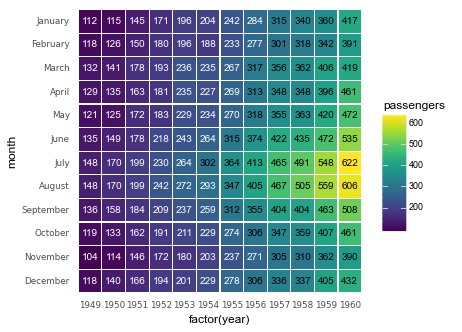

In [3]:
if "flights.csv" in os.listdir():
    pass
else:
    os.system("wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv")
flights = pd.read_csv('flights.csv')
months = flights['month'].unique()  # Months ordered January, ..., December
flights['month'] = pd.Categorical(flights['month'], categories=months)
flights.head()
text_color = np.array(['black']*len(flights))
text_color[flights['passengers']<300] = 'white'
g = (ggplot(flights, aes('factor(year)', 'month', fill='passengers'))
 + geom_tile(aes(width=.95, height=.95))
 + geom_text(aes(label='passengers'), size=10, color=text_color)
 + scale_y_discrete(limits=months[::-1])          
 + theme(                                         
     axis_ticks=element_blank(),
     panel_background=element_rect(fill='white'))
)
g1 = pw.load_ggplot(g, figsize=(4,4))
g1.savefig()

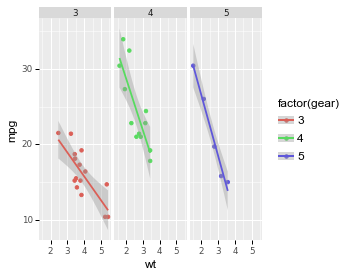

In [4]:
g = (ggplot(mtcars, aes('wt', 'mpg', color='factor(gear)'))
 + geom_point()
 + stat_smooth(method='lm')
 + facet_wrap('~gear'))
g2 = pw.load_ggplot(g, figsize=(4,4))
g2.savefig()

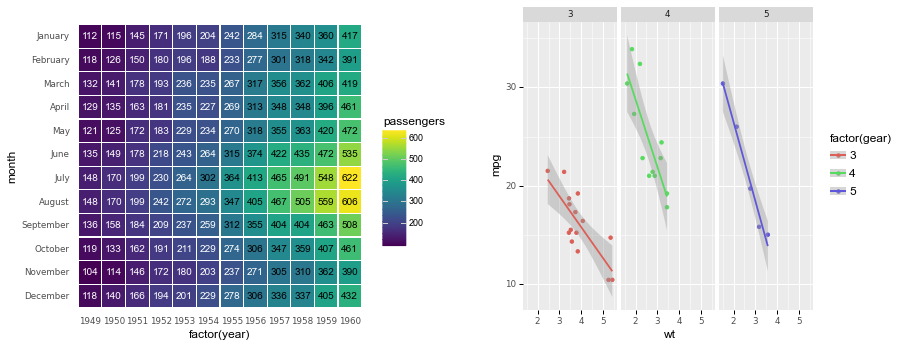

In [5]:
g12 = (g1|g2)
g12.savefig()

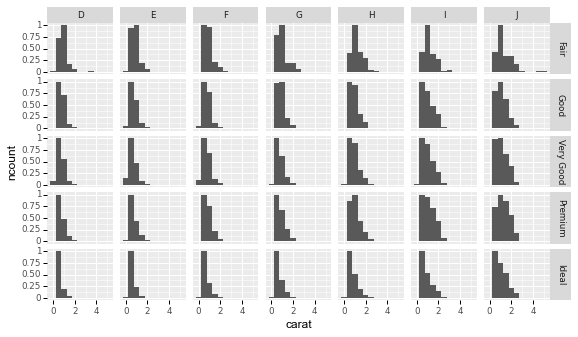

In [6]:
g = (ggplot(diamonds, aes(x='carat', y=after_stat('ncount'))) 
 + geom_histogram(binwidth=0.5)
 + facet_grid('cut ~ color'))
g3 = pw.load_ggplot(g, figsize=(9,5))
g3.savefig()

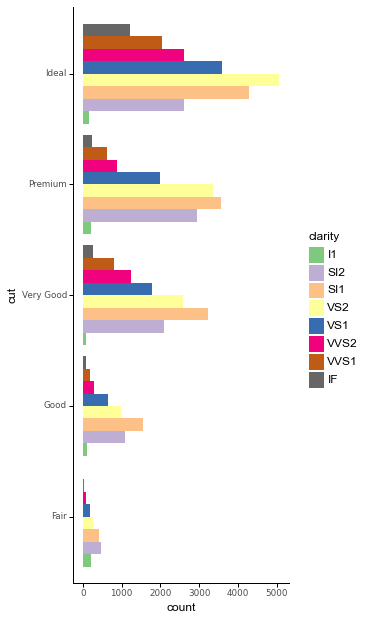

In [7]:
g = (ggplot(data=diamonds) 
 + geom_bar(mapping=aes(x="cut", fill="clarity"), position="dodge")
 + scale_fill_brewer(palette="Accent", type='qual', direction=1)
 + theme_classic()
 + coord_flip())
g4 = pw.load_ggplot(g, figsize=(3,8))
g4.savefig()

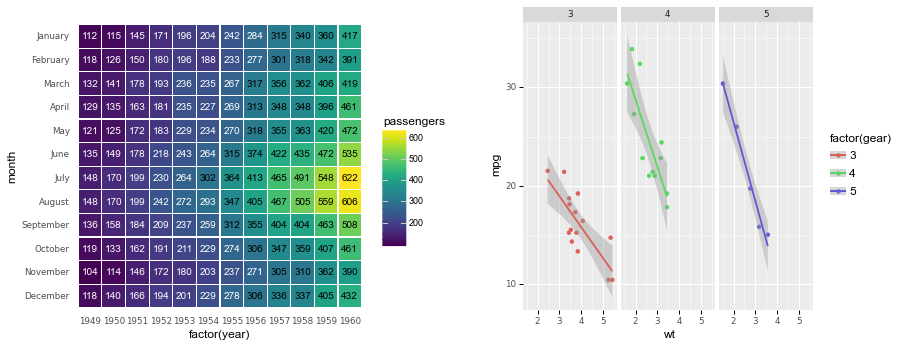

In [8]:
g12 = (g1|g2)
g12.savefig()

In [ ]:
g123 = (g1|g2)/g3
g123.savefig()

In [ ]:
g1234 = ((g1|g2)/g3)|g4
g1234.savefig()